In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from glob import glob
import cmocean
import matplotlib.dates as mdates
import datetime
import sys
sys.path.append('../')
from utils import *
from numerics import *
from load import *

---

#### runoff sensitivity analysis
fake river on panul coordinates

psource:   Nsrc  Isrc  Jsrc  Dsrc  Qbar [m3/s]    Lsrc        Tsrc \
            1 \
		  130   147     0   -Q            F T      20. 2. \
          
CST_SHAPE \
SALINITY = 2 PSU \
Q = [1, 10, 50 , 100, 250]


In [ ]:
x=xr.open_dataset('/ceaza/lucas/CROCO/DESALADORAS_RUND0_RIOS/OUTPUT/PANUL_CSTSHAPE_Q0_S2/crocod0_avg_Y2001M2.nc')
hc,Cs_r = x.hc.item(),x.Cs_r
del x
data = load_croco('/ceaza/lucas/CROCO/DESALADORAS_RUND0_RIOS/OUTPUT/PANUL_CSTSHAPE_Q0_S2/crocod0_avg_Y2001M2.nc', '1949-12-31 00:00:00').sortby('time')
z_rho = rhopoints_depths(data.h.expand_dims(dim={'s_rho':data.s_rho}), data.zeta, data.s_rho, Cs_r, hc)
z_rho = z_rho.transpose('time', 's_rho', 'eta_rho', 'xi_rho')
data = xr.merge([data, z_rho.to_dataset(name='z_rho')])
control_avg = data.copy().load()
del data

x=xr.open_dataset('/ceaza/lucas/CROCO/DESALADORAS_RUND0_RIOS/OUTPUT/PANUL_CSTSHAPE_Q0_S2/crocod0_avg_Y2001M2.nc')
hc,Cs_r = x.hc.item(),x.Cs_r
del x
data = load_croco('/ceaza/lucas/CROCO/DESALADORAS_RUND0_RIOS/OUTPUT/PANUL_CSTSHAPE_Q0_S2/crocod0_his_Y2001M2.nc', '1949-12-31 00:00:00').sortby('time')
z_rho = rhopoints_depths(data.h.expand_dims(dim={'s_rho':data.s_rho}), data.zeta, data.s_rho, Cs_r, hc)
z_rho = z_rho.transpose('time', 's_rho', 'eta_rho', 'xi_rho')
data = xr.merge([data, z_rho.to_dataset(name='z_rho')])
control_his = data.copy().load()
del data


In [245]:
tags = [5, 20, 35]
rivers_avg = []
rivers_his = []
for t in tags:
    data = load_croco('data/DESALADORAS_RUND0_RIOS/PANUL_CSTSHAPE_Q'+str(t)+'_S2/crocod0_avg_Y2001M2.nc', '1949-12-31 00:00:00').sortby('time')
    z_rho = rhopoints_depths(data.h.expand_dims(dim={'s_rho':data.s_rho}), data.zeta, data.s_rho, Cs_r, hc)
    z_rho = z_rho.transpose('time', 's_rho', 'eta_rho', 'xi_rho')
    data = xr.merge([data, z_rho.to_dataset(name='z_rho')])
    river1_avg = data.copy()
    rivers_avg.append(river1_avg)
    del data

    data = load_croco('data/DESALADORAS_RUND0_RIOS/PANUL_CSTSHAPE_Q'+str(t)+'_S2/crocod0_his_Y2001M2.nc', '1949-12-31 00:00:00').sortby('time')
    z_rho = rhopoints_depths(data.h.expand_dims(dim={'s_rho':data.s_rho}), data.zeta, data.s_rho, Cs_r, hc)
    z_rho = z_rho.transpose('time', 's_rho', 'eta_rho', 'xi_rho')
    data = xr.merge([data, z_rho.to_dataset(name='z_rho')])
    river1_his = data.copy()
    rivers_his.append(river1_his)
    del data

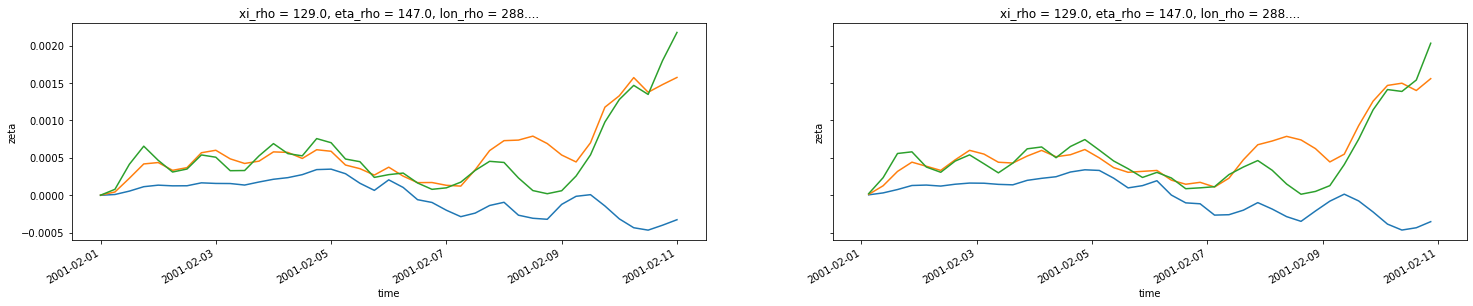

In [246]:
fig, ax = plt.subplots(1,2, sharex=True, sharey='row', figsize=(25,4))

for i,ty in enumerate(['his','avg']):
    c = eval('control_'+ty).zeta.sel(eta_rho=147, xi_rho=129)
    # c.plot(color='k', lw=2, ax=ax[i], label='Control')
    for k in range(len(rivers_avg)):
        q = eval('rivers_'+ty)[k].zeta.sel(eta_rho=147, xi_rho=129)
        (q-c).plot(ax=ax[i], label='Q{:.0f}'.format(tags[k]))
    
    # for j in range(len(ax[:])):
    #     ax[j,i].set_title('')
    #     ax[j,i].set_ylabel('')
    #     ax[j,i].set_xlabel('')
    #     ax[j,i].grid(ls=":")
        # ax[j,i].set_xlim(pd.to_datetime('2001-02-01'),
        #                  pd.to_datetime('2001-02-02'))
        
# ax[0,0].set_title('his files')
# ax[0,1].set_title('avg files')
# ax[0,0].legend()

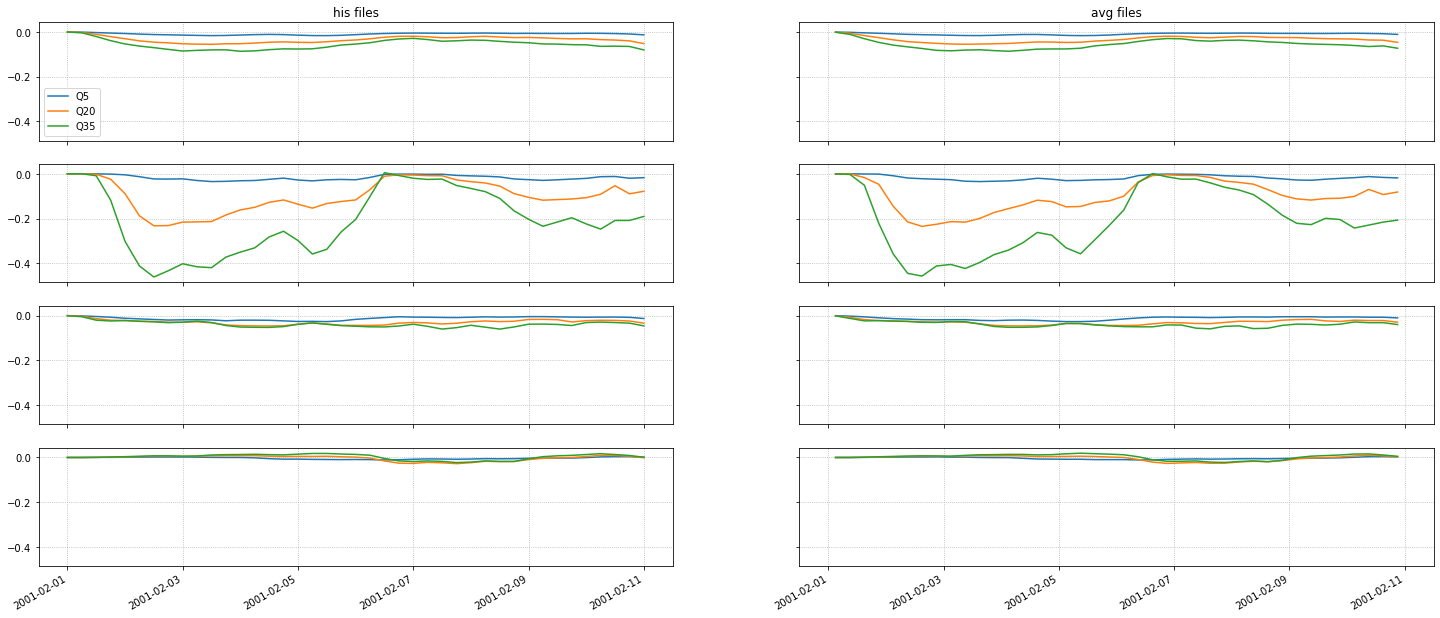

In [247]:
fig, ax = plt.subplots(4,2, sharex=True, sharey=True, figsize=(25,10))
for i,ty in enumerate(['his','avg']):
    c = eval('control_'+ty).salt.sel(eta_rho=147, xi_rho=129)
    # c.mean('s_rho').plot(color='k', lw=2, ax=ax[0,i], label='Control')
    # c.isel(s_rho=-1).plot(color='k', lw=2, ax=ax[1,i])
    # c.isel(s_rho=-25).plot(color='k', lw=2, ax=ax[2,i])
    # c.isel(s_rho=-50).plot(color='k', lw=2, ax=ax[3,i])
    for k in range(len(rivers_avg)):
        q = eval('rivers_'+ty)[k].salt.sel(eta_rho=147, xi_rho=129)-c
        q.mean('s_rho').plot(ax=ax[0,i], label='Q{:.0f}'.format(tags[k]))
        q.isel(s_rho=-1).plot(ax=ax[1,i], label='Q{:.0f}'.format(tags[k]))
        q.isel(s_rho=-25).plot(ax=ax[2,i], label='Q{:.0f}'.format(tags[k]))
        q.isel(s_rho=-50).plot(ax=ax[3,i], label='Q{:.0f}'.format(tags[k]))

    
    for j in range(len(ax[:,0])):
        ax[j,i].set_title('')
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].grid(ls=":")
        # ax[j,i].set_xlim(pd.to_datetime('2001-02-01'),
        #                  pd.to_datetime('2001-02-02'))
        
ax[0,0].set_title('his files')
ax[0,1].set_title('avg files')
ax[0,0].legend()

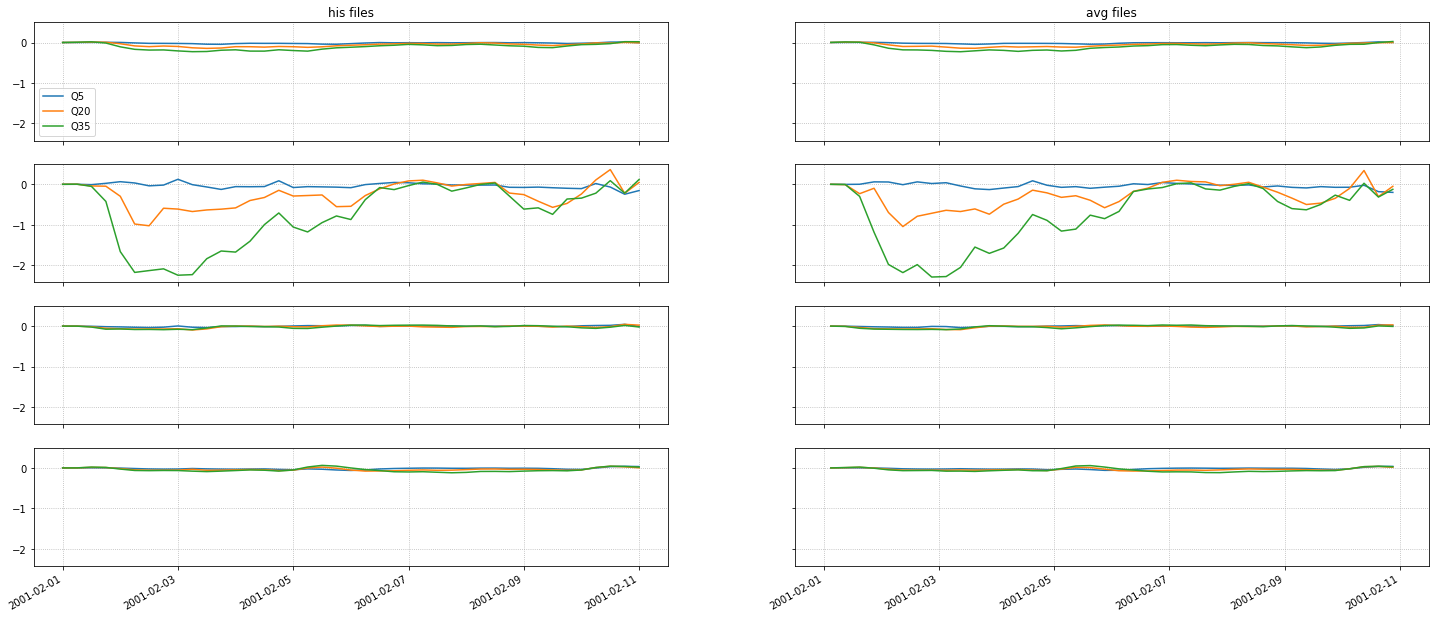

In [248]:
fig, ax = plt.subplots(4,2, sharex=True, sharey=True, figsize=(25,10))
for i,ty in enumerate(['his','avg']):
    c = eval('control_'+ty).temp.sel(eta_rho=147, xi_rho=129)
    # c.mean('s_rho').plot(color='k', lw=2, ax=ax[0,i], label='Control')
    # c.isel(s_rho=-1).plot(color='k', lw=2, ax=ax[1,i])
    # c.isel(s_rho=-25).plot(color='k', lw=2, ax=ax[2,i])
    # c.isel(s_rho=-50).plot(color='k', lw=2, ax=ax[3,i])
    for k in range(len(rivers_avg)):
        q = eval('rivers_'+ty)[k].temp.sel(eta_rho=147, xi_rho=129)-c
        q.mean('s_rho').plot(ax=ax[0,i], label='Q{:.0f}'.format(tags[k]))
        q.isel(s_rho=-1).plot(ax=ax[1,i], label='Q{:.0f}'.format(tags[k]))
        q.isel(s_rho=-25).plot(ax=ax[2,i], label='Q{:.0f}'.format(tags[k]))
        q.isel(s_rho=-50).plot(ax=ax[3,i], label='Q{:.0f}'.format(tags[k]))

    
    for j in range(len(ax[:,0])):
        ax[j,i].set_title('')
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].grid(ls=":")
        # ax[j,i].set_xlim(pd.to_datetime('2001-02-01'),
        #                  pd.to_datetime('2001-02-02'))
        
ax[0,0].set_title('his files')
ax[0,1].set_title('avg files')
ax[0,0].legend()

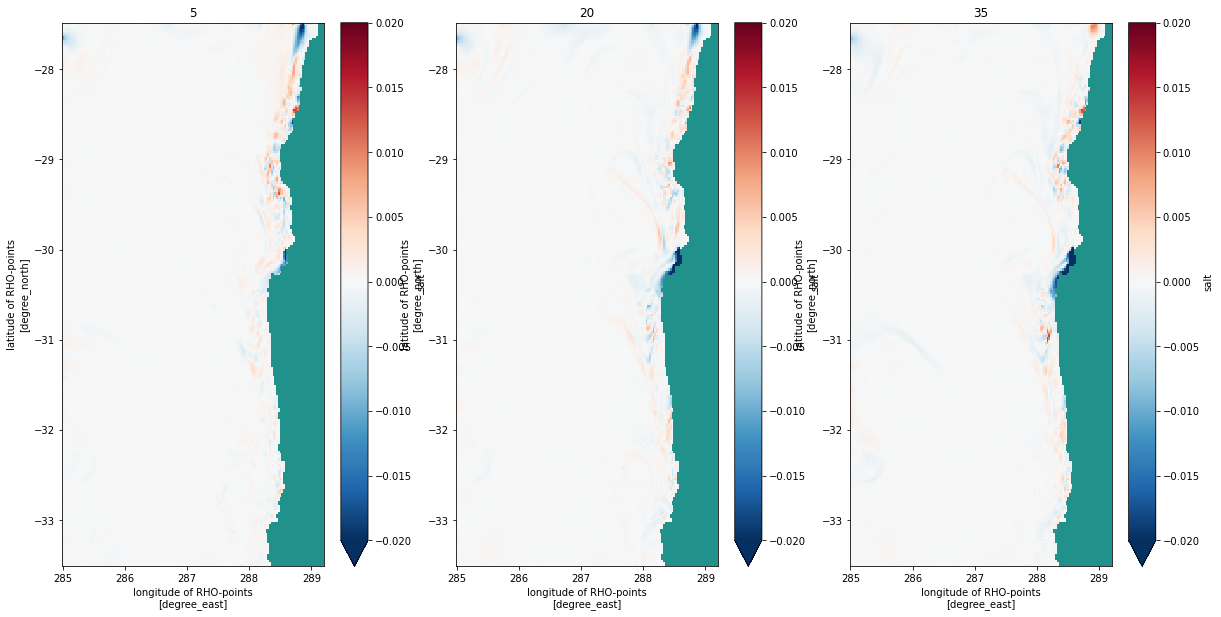

In [289]:
fig,ax = plt.subplots(1,len(tags), figsize=(20,10))
for i,axis in enumerate(ax.ravel()):
    (control_his.salt[0][0].where(control_his.salt[0][0]==0)).plot(x='lon_rho',y='lat_rho', add_colorbar=False,ax=ax[i])
    (rivers_his[i].salt-control_his.salt)[4*10].mean('s_rho').where(control_his.salt[0][0]!=0).plot(x='lon_rho', y='lat_rho',ax=ax[i],vmin=-0.02,vmax=0.02, cmap='RdBu_r')
    axis.set_title(tags[i])
# plt.xlim(288,289)
# plt.ylim(-31,-29)

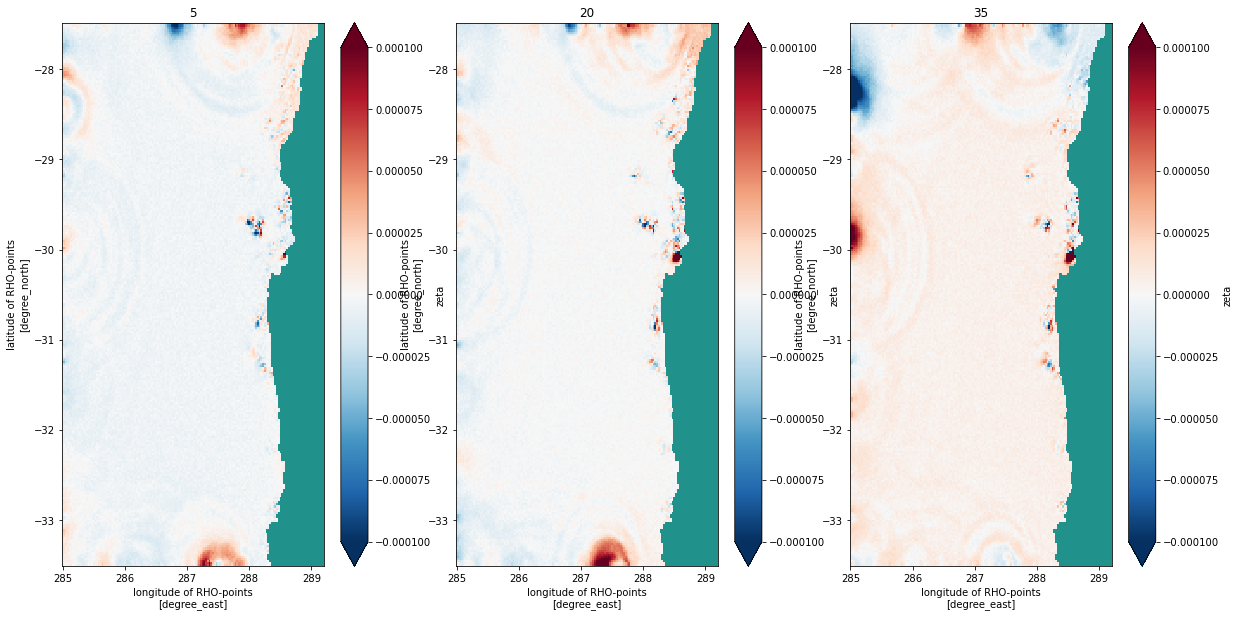

In [275]:
fig,ax = plt.subplots(1,len(tags), figsize=(20,10))
for i,axis in enumerate(ax.ravel()):
    (control_his.salt[0][0].where(control_his.salt[0][0]==0)).plot(x='lon_rho',y='lat_rho', add_colorbar=False,ax=ax[i])
    (rivers_his[i].zeta-control_his.zeta)[4*1].where(control_his.salt[0][0]!=0).plot(x='lon_rho', y='lat_rho',ax=ax[i], cmap='RdBu_r', vmin=-1e-4,vmax=1e-4)
    axis.set_title(tags[i])
# plt.xlim(288,289)
# plt.ylim(-31,-29)

In [276]:
diff = xr.open_dataset('~/CROCO/DESALADORAS_RUND0/OUTPUT/backup/diff.nc')